#  Car Price Prediction Using Linear Regression 🚗

This is my first machine learning project, where I built a simple model to predict car prices using Linear Regression.

I started by cleaning and preparing the data, then I encoded the text-based features (like brand and body type) into numbers so that the model could understand them.

After that, I trained a regression model to learn from the data. Finally, I tested it by giving it new car details to see what price it would predict.

The goal of this project was to learn how to go from raw data to a working prediction model. I kept it simple and focused on understanding the basic steps like:

- Preparing data

- Encoding categories

- Training a model

- Making predictions

I’m still learning, and I hope to try other models and improvements in the future!

### Importing libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Bringing the dataset
df = pd.read_csv('cars.csv')
df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0
...,...,...,...,...,...,...,...,...,...
4168,Renault,sedan,430,2.0,Gas,yes,1988,25,999.0
4169,Renault,van,200,1.9,Diesel,no,1997,Scenic,800.0
4170,Mitsubishi,sedan,340,NaN,Other,yes,1986,Galant,800.0
4171,Toyota,sedan,10,1.5,Petrol,yes,1979,Corolla,600.0


## Data Preprocessing

In [3]:
# Will see if there is null values
df.isnull().sum()

Brand             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
Model             0
Price             0
dtype: int64

In [4]:
# Some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Body          4173 non-null   object 
 2   Mileage       4173 non-null   int64  
 3   EngineV       4025 non-null   float64
 4   Engine Type   4173 non-null   object 
 5   Registration  4173 non-null   object 
 6   Year          4173 non-null   int64  
 7   Model         4173 non-null   object 
 8   Price         4173 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 293.5+ KB


In [5]:
# filling the null values by mean
df['EngineV'] = df['EngineV'].fillna(df['EngineV'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Body          4173 non-null   object 
 2   Mileage       4173 non-null   int64  
 3   EngineV       4173 non-null   float64
 4   Engine Type   4173 non-null   object 
 5   Registration  4173 non-null   object 
 6   Year          4173 non-null   int64  
 7   Model         4173 non-null   object 
 8   Price         4173 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 293.5+ KB


In [6]:
# Encoding Categorical Features Using LabelEncoder
le_brand = preprocessing.LabelEncoder()
le_brand.fit(df['Brand']) 

le_body = preprocessing.LabelEncoder()
le_body.fit(df['Body']) 

le_model = preprocessing.LabelEncoder()
le_model.fit(df['Model']) 

le_enginetype = preprocessing.LabelEncoder()
le_enginetype.fit(df['Engine Type']) 

le_reg = preprocessing.LabelEncoder()
le_reg.fit(df['Registration']) 


df['Brand_num'] = le_brand.transform(df['Brand']) 
df['Body_num'] = le_body.transform(df['Body']) 
df['Model_num'] = le_model.transform(df['Model']) 
df['EngineType_num'] = le_enginetype.transform(df['Engine Type']) 
df['Registration_num'] = le_reg.transform(df['Registration']) 

df=df.drop(columns=['Brand','Body','Engine Type','Registration','Model'])

In [7]:
df.head()

,Mileage,EngineV,Year,Price,Brand_num,Body_num,Model_num,EngineType_num,Registration_num
0,68,6.0,2011,300000.0,2,3,239,3,1
1,37,5.0,2012,300000.0,2,2,127,3,1
2,29,6.0,2011,295000.0,2,3,242,3,1
3,29,6.0,2011,295000.0,2,3,239,3,1
4,6,5.5,2016,250000.0,2,2,240,3,1


In [8]:
# Will see some statistics
df.describe()

,Mileage,EngineV,Year,Price,Brand_num,Body_num,Model_num,EngineType_num,Registration_num
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,164.141625,2.762127,2006.365684,19218.579430,3.171340,2.562425,163.211598,1.301941,0.905584
std,104.763054,4.846869,6.685332,24625.021129,2.084648,1.642627,86.903844,1.359738,0.292442
min,0.000000,0.600000,1969.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,1.900000,2003.000000,6999.000000,1.000000,1.000000,98.000000,0.000000,1.000000
50%,158.000000,2.200000,2007.000000,11500.000000,3.000000,3.000000,162.000000,1.000000,1.000000
75%,230.000000,3.000000,2012.000000,21700.000000,5.000000,3.000000,226.000000,3.000000,1.000000
max,980.000000,99.990000,2016.000000,300000.000000,6.000000,5.000000,305.000000,3.000000,1.000000


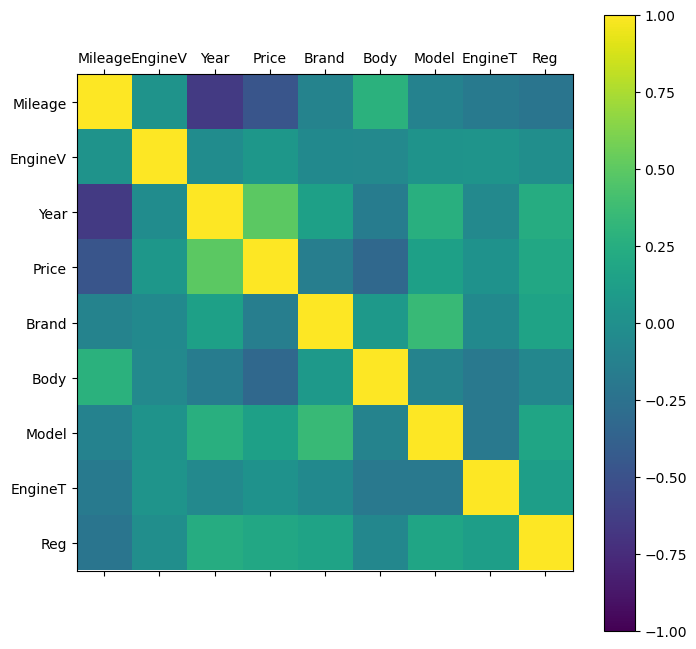

In [9]:
# Will see the correlations of the features
correlations = df.corr(method='pearson')
 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7,8]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])
ax.set_yticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])

plt.show()

In [10]:
# Splitting the data
X = df[['Year','Mileage' ,'Body_num','Brand_num']]

y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


### Model Training 

In [11]:
# Fitting the data
model = LinearRegression()

model.fit(X_train.values, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -2458068.731221551
Coefficients: [ 1246.02042209   -49.69656332 -2841.00648826 -2385.76032959]


In [12]:
# Predicting the data
y_pred = model.predict(X_test.values)

print ('MSE :', mean_squared_error (y_pred, y_test))
print ('RMSE :', sqrt(mean_squared_error (y_pred, y_test)))
print ('MAE :', mean_absolute_error(y_pred, y_test))

MSE : 443500711.90153044
RMSE : 21059.45659084133
MAE : 11443.306546353038


#### We will add a new car to see the prediction

In [13]:
year = 2018
milage = 60
body = 'sedan'
brand = 'Toyota'

body_num = le_body.transform([body])[0]
brand_num = le_brand.transform([brand])[0]

example = [[year, milage, body_num, brand_num]]
print(example)

ypred = model.predict(example)
print(ypred)

[[2018, 60, np.int64(3), np.int64(5)]]
[32966.86563599]
